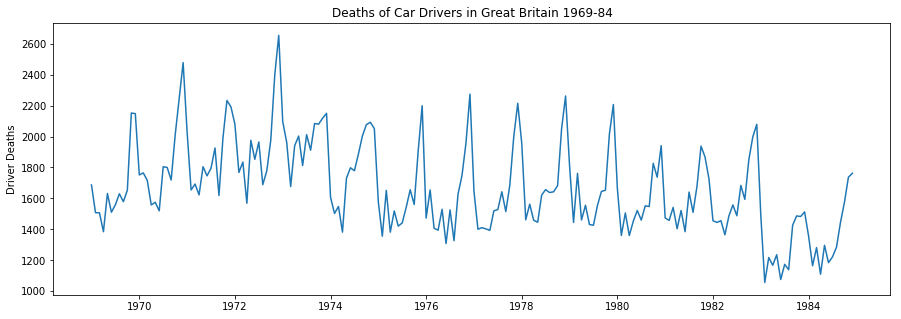

In [4]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
data.index = data['time'];
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;
plt.figure(figsize=(15,5));
plt.plot(data.index,data['value']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

In [7]:
model = pf.ARIMAX(data=data, formula='value~1+seat_belt+oil_crisis',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: value                               Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1297.4995                        
End Date: 1984.91666666667                              AIC: 2606.999                                     
Number of observations: 191                             BIC: 2626.5127                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9168     0.076      12.0651  0.0      (0.7679 | 1.0658)        
MA(1)                                

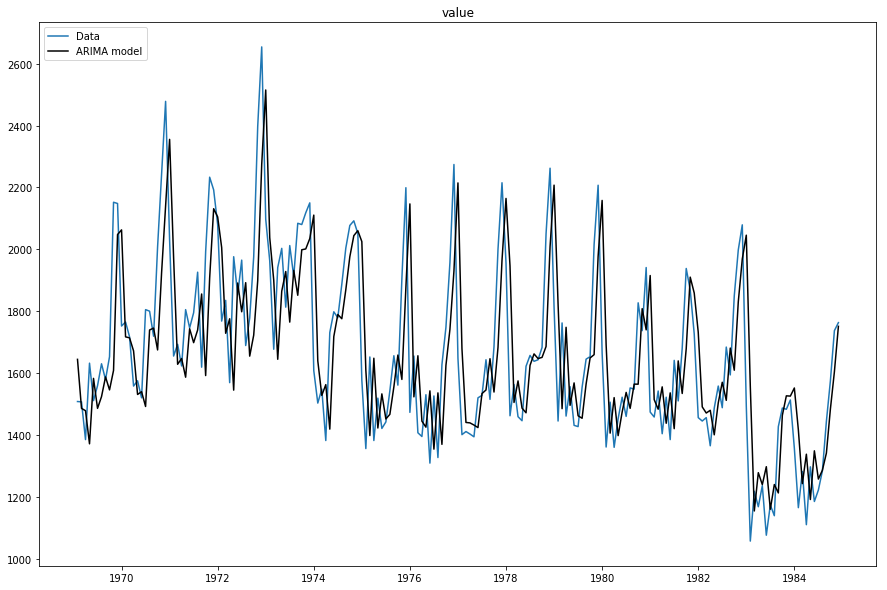

In [8]:
model.plot_fit(figsize=(15,10))


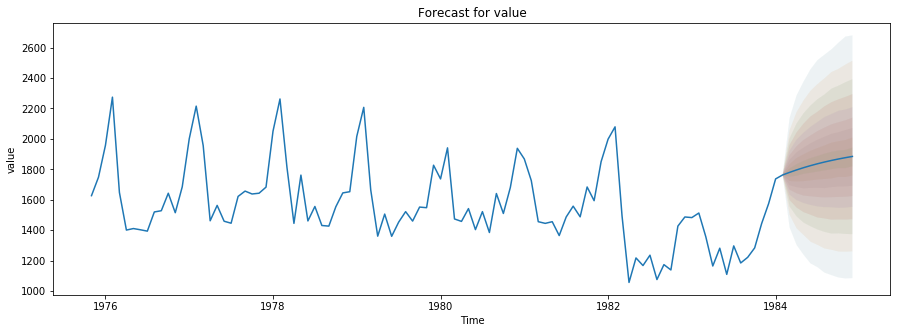

In [9]:
model.plot_predict(h=10, oos_data=data.iloc[-12:], past_values=100, figsize=(15,5))
